### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [1]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

import numpy as np
np.shape(classes)

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


(1000,)

### Using pre-trained model: inception
Keras has a number of models for which you can use pre-trained weights. The interface is super-straightforward:

In [2]:
import tensorflow as tf

In [3]:
import keras
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

In [5]:
# model.summary()

### Predict class probabilities

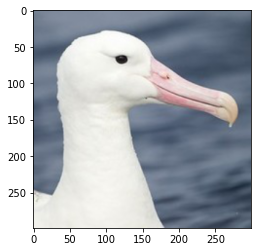

top-10 classes are:
0.9282	albatross
0.0016	turnstile
0.0008	drake
0.0005	collie
0.0004	hammerhead
0.0004	Shetland sheepdog
0.0004	nipple
0.0004	cello
0.0004	goose


In [4]:
import matplotlib.pyplot as plt
from skimage.transform import resize
%matplotlib inline

img = resize(plt.imread('albatross.jpg'), (299,  299))

plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255)

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

### Having fun with pre-trained nets

In [10]:
# !wget https://upload.wikimedia.org/wikipedia/en/b/b9/Terminator-2-judgement-day.jpg -O img.jpg

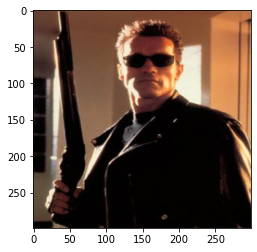

top-10 classes are:
0.4340	sunglass
0.3304	sunglasses
0.0397	rifle
0.0344	trench coat
0.0138	bassoon
0.0096	assault rifle
0.0073	cloak
0.0053	electric guitar
0.0052	suit


In [5]:
img = resize(plt.imread('img.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255.)

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

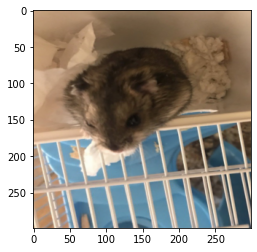

top-3 classes are:
0.6135	hamster
0.0608	shopping cart
0.0218	shopping basket


In [7]:
img = resize(plt.imread('img3.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255.)

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-4:-1]
print ('top-3 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

### How do you reuse layers

Since model is just a sequence of layers, one can apply it as any other Keras model. Then you can build more layers on top of it, train them and maybe fine-tune "body" weights a bit.

In [7]:
# img = keras.backend.Input('float32',[None,299,299,3])

neck = zoo.InceptionV3(include_top=False, weights='imagenet')(img[None])

# hid = keras.layers.GlobalMaxPool2D()(neck)
hid1 = keras.layers.GlobalMaxPool2D()(neck)

hid2 = keras.layers.Dense(512,activation='relu')(hid1)

out = keras.layers.Dense(10,activation='softmax')(hid2)

#<...> loss, training, etc.

# Grand-quest: Dogs Vs Cats
* original competition
* https://www.kaggle.com/c/dogs-vs-cats
* 25k JPEG images of various size, 2 classes (guess what)

### Your main objective
* In this seminar your goal is to fine-tune a pre-trained model to distinguish between the two rivaling animals
* The first step is to just reuse some network layer as features

# for starters
* Train sklearn model, evaluate validation accuracy (should be >80%

In [5]:
#extract features from images
from tqdm import tqdm
import numpy as np
from skimage.io import imread
import pickle
import matplotlib.pyplot as plt
from skimage.transform import resize
import keras
import keras.applications as zoo
import tensorflow as tf
# from scipy.misc import imresize

import os

In [1]:
X = []
Y = []

#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir('train/')):
    y = fname.startswith("cat")
    img = plt.imread("train/"+fname)
    img = resize(img,(128,128))
    #img = imresize(img,(IMAGE_W,IMAGE_W))
    img = zoo.inception_v3.preprocess_input(img[None].astype('float32') * 255)
    
    #features = <use network to process the image into features>
#     features = hid1
    Y.append(y)
    X.append(img)

100%|██████████| 25000/25000 [07:44<00:00, 53.84it/s]


In [2]:
XX = X.copy()

XX = np.array(XX).reshape((25000, 128, 128, 3))
XX.shape

(25000, 128, 128, 3)

In [ ]:
# writing this info to pickle file!!! 
# huge file, ~5GB. one might evaluate the above code and get the XX in around 6 mins

In [3]:
fileObj = open('trainX.pickle', 'wb')
pickle.dump(XX, fileObj)
fileObj.close()

In [4]:
fileObj = open('trainY.pickle', 'wb')
pickle.dump(Y, fileObj)
fileObj.close()

In [ ]:
# reading from pickle file!!

In [6]:
import pickle 
import numpy as np

fileObj = open('trainX.pickle', 'rb')
X = pickle.load(fileObj)
fileObj.close()

fileObj = open('trainY.pickle', 'rb')
Y = pickle.load(fileObj)
fileObj.close()

In [54]:
# XX = np.concatenate(XX) #stack all [1xfeatures] matrices into one. 
# assert XX.ndim==2
# #WARNING! the concatenate works for [1xN] matrices. If you have other format, stack them yourself.

# #crop if we ended prematurely
# YY = YY[:len(XX)]

In [8]:
# preproseccing the labels

Y = keras.utils.to_categorical(Y, dtype='float32')
Y = np.argmax(Y, axis=1)
Y

array([0, 1, 0, ..., 0, 1, 1])

In [9]:
# <split data either here or use cross-validation>

from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.4)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(15000, 128, 128, 3)
(5000, 128, 128, 3)
(5000, 128, 128, 3)


# My first CNN1:

* InceptionV3 + GlobalMaxPool2D {untrainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_1.h5;
* RMSProp(lr=1e-4);
* batch size 32;
* 10 epochs;
* accuracy on test set: ~95.1% 

In [10]:
from keras.applications import InceptionV3
from keras.layers import GlobalAvgPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.applications import InceptionV3
from keras import Model
import keras.layers as L

In [11]:
neck = zoo.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
neck1 = neck.output
hid = L.GlobalMaxPool2D()(neck1)

hid = L.Dense(512,activation='relu')(hid)

hid = L.Dropout(0.2)(hid)

out = L.Dense(1,activation='sigmoid')(hid)

model = Model(neck.input, out)

for layer in neck.layers:
    layer.trainable = False

In [13]:
optim = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
training_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/10
469/469 [==============================] - 121s 252ms/step - loss: 0.3625 - accuracy: 0.8822 - val_loss: 0.2396 - val_accuracy: 0.9148
Epoch 2/10
469/469 [==============================] - 137s 293ms/step - loss: 0.1527 - accuracy: 0.9431 - val_loss: 0.1539 - val_accuracy: 0.9448
Epoch 3/10
469/469 [==============================] - 142s 304ms/step - loss: 0.1239 - accuracy: 0.9525 - val_loss: 0.1473 - val_accuracy: 0.9460
Epoch 4/10
469/469 [==============================] - 144s 307ms/step - loss: 0.1021 - accuracy: 0.9619 - val_loss: 0.1799 - val_accuracy: 0.9394
Epoch 5/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0745 - accuracy: 0.9722 - val_loss: 0.1572 - val_accuracy: 0.9468
Epoch 6/10
469/469 [==============================] - 145s 310ms/step - loss: 0.0599 - accuracy: 0.9775 - val_loss: 0.1610 - val_accuracy: 0.9452
Epoch 7/10
469/469 [==============================] - 142s 303ms/step - loss: 0.0500 - accuracy: 0.9832 - val_loss: 0.1700 -

In [16]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 33s 211ms/step - loss: 0.1547 - accuracy: 0.9514


[0.15474459528923035, 0.9513999819755554]

In [17]:
# save weights to file
model.save_weights("weights_1.h5")

# load weights from file (can call without model.fit)
# model.load_weights("weights_1.h5")

# My second CNN: CNN1 + Data augmentation:

* InceptionV3 + GlobalMaxPool2D {untrainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_2.h5;
* Adam(lr=5e-5);
* batch size 64;
* 100 epochs;
* accuracy on test set: ~95.5% 

In [12]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [13]:
K.clear_session()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

optim = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
fit_history=model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=100, validation_data=(X_val,y_val), verbose = 1)

Epoch 1/100
235/235 [==============================] - 119s 495ms/step - loss: 0.5416 - accuracy: 0.8014 - val_loss: 0.1840 - val_accuracy: 0.9254
Epoch 2/100
235/235 [==============================] - 128s 543ms/step - loss: 0.2256 - accuracy: 0.9171 - val_loss: 0.1636 - val_accuracy: 0.9320
Epoch 3/100
235/235 [==============================] - 129s 547ms/step - loss: 0.1921 - accuracy: 0.9240 - val_loss: 0.1498 - val_accuracy: 0.9380
Epoch 4/100
235/235 [==============================] - 130s 551ms/step - loss: 0.1799 - accuracy: 0.9272 - val_loss: 0.1494 - val_accuracy: 0.9390
Epoch 5/100
235/235 [==============================] - 131s 556ms/step - loss: 0.1672 - accuracy: 0.9317 - val_loss: 0.1435 - val_accuracy: 0.9412
Epoch 6/100
235/235 [==============================] - 129s 550ms/step - loss: 0.1622 - accuracy: 0.9345 - val_loss: 0.1389 - val_accuracy: 0.9414
Epoch 7/100
235/235 [==============================] - 130s 552ms/step - loss: 0.1505 - accuracy: 0.9368 - val_loss: 0

In [15]:
# save weights to file
model.save_weights("weights_2.h5")

# load weights from file (can call without model.fit)
# model.load_weights("weights_last.h5")

In [16]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 29s 187ms/step - loss: 0.1310 - accuracy: 0.9548


[0.13104714453220367, 0.954800009727478]

# My third CNN3=CNN1 + Data augmentation + trainable Inception layers[50:]:

* InceptionV3 + GlobalMaxPool2D {partly trainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_3.h5;
* Adamax(lr=1e-4);
* batch size 32;
* 10 epochs;
* accuracy on test set: ~96.2% 

In [21]:
K.clear_session()
from keras.applications import VGG16
import keras.regularizers as regul

In [40]:
neck = zoo.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
neck1 = neck.output
hid = L.GlobalMaxPool2D()(neck1)

hid = L.Dense(512,activation='elu')(hid)

hid = L.Dropout(0.2)(hid)

out = L.Dense(1,activation='sigmoid')(hid)

model = Model(neck.input, out)

for layer in neck.layers[:50]:
    layer.trainable = False

In [46]:
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
fit_history_3=model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val,y_val), verbose = 1)

Epoch 1/10
469/469 [==============================] - 489s 1s/step - loss: 0.2421 - accuracy: 0.8951 - val_loss: 0.2249 - val_accuracy: 0.9276
Epoch 2/10
469/469 [==============================] - 505s 1s/step - loss: 0.1728 - accuracy: 0.9274 - val_loss: 0.1388 - val_accuracy: 0.9466
Epoch 3/10
469/469 [==============================] - 542s 1s/step - loss: 0.1296 - accuracy: 0.9496 - val_loss: 0.1330 - val_accuracy: 0.9506
Epoch 4/10
469/469 [==============================] - 559s 1s/step - loss: 0.1203 - accuracy: 0.9545 - val_loss: 0.1155 - val_accuracy: 0.9554
Epoch 5/10
469/469 [==============================] - 562s 1s/step - loss: 0.0940 - accuracy: 0.9636 - val_loss: 0.1122 - val_accuracy: 0.9584
Epoch 6/10
469/469 [==============================] - 483s 1s/step - loss: 0.0845 - accuracy: 0.9682 - val_loss: 0.1155 - val_accuracy: 0.9562
Epoch 7/10
469/469 [==============================] - 484s 1s/step - loss: 0.0626 - accuracy: 0.9771 - val_loss: 0.1183 - val_accuracy: 0.9578

In [48]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 37s 237ms/step - loss: 0.1152 - accuracy: 0.9618


[0.11515521258115768, 0.9617999792098999]

In [49]:
# save weights to file
model.save_weights("weights_3.h5")

# load weights from file (can call without model.fit)
# model.load_weights("weights_3.h5")

# My report:

First of all this task is truly intersting. I've learned a lot of technical stuff not directly connected with NN's, dived into keras documentation, used different crocodile-head-cropping technics, etc. Even tried to train all this on my GPU (unsuccessful yet). PLayed a bit with different optimizers, regularizations, batch sizes and epochs. Learned how to work with pre-trained NN's, add, delete layers, partly retrain the pre-trained network, etc. Also played with different classificators, but NN's seems to be better.

Well, results:
### CNN1:

* InceptionV3 + GlobalMaxPool2D {untrainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_1.h5;
* RMSProp(lr=1e-4);
* batch size 32;
* 10 epochs;
* accuracy on test set: ~95.1% 

### CNN2=CNN1 + Data augmentation:

* InceptionV3 + GlobalMaxPool2D {untrainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_2.h5;
* Adam(lr=5e-5);
* batch size 64;
* 100 epochs;
* accuracy on test set: ~95.5% 

### CNN3=CNN1 + Data augmentation + trainable Inception layers[50:]:

* InceptionV3 + GlobalMaxPool2D {partly trainable} + Dense(512) + Dropout(0.2) + Dense(1)
* weights: weights_3.h5;
* Adamax(lr=1e-4);
* batch size 32;
* 10 epochs;
* accuracy on test set: ~96.2% 


In [ ]:
____________

__load our dakka__

![img](https://s-media-cache-ak0.pinimg.com/564x/80/a1/81/80a1817a928744a934a7d32e7c03b242.jpg)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Main quest

* Get the score improved!
* You have to reach __at least 95%__ on the test set. More = better.

No methods are illegal: ensembling, data augmentation, NN hacks. 
Just don't let test data slip into training.


### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

### Choose which vgg layers are you going to use
  * Anything but for prob is okay
  * Do not forget that vgg16 uses dropout

### Build a few layers on top of chosen "neck" layers.
  * a good idea is to just stack more layers inside the same network
  * alternative: stack on top of get_output

### Train the newly added layers for some iterations
  * you can selectively train some weights by setting var_list in the optimizer
      * `opt = tf.train.AdamOptimizer(learning_rate=...)`
      * `opt.minimize(loss,var_list=variables_you_wanna_train)`
  * it's cruicial to monitor the network performance at this and following steps

### Fine-tune the network body
  * probably a good idea to SAVE your new network weights now 'cuz it's easy to mess things up.
  * Moreover, saving weights periodically is a no-nonsense idea
  * even more cruicial to monitor validation performance
  * main network body may need a separate, much lower learning rate
      * you can create two update operations
      * `opt1 = tf.train.AdamOptimizer(learning_rate=lr1)`
      * `opt1.minimize(loss,var_list=head_weights)`
      * `opt2 = tf.train.AdamOptimizer(learning_rate=lr2)`
      * `opt2.minimize(loss,var_list=body_weights)`
 
### Grading
* 95% accuracy on test yields 100 points
* -10 points per 5% less accuracy

### Some ways to get bonus points
* explore other networks from the model zoo
* play with architecture
* 96%/97%/98%/99%/99.5% test score (screen pls).
* data augmentation, prediction-time data augmentation
* use any more advanced fine-tuning technique you know/read anywhere
* ml hacks that benefit the final score


In [ ]:
#<A whole lot of your code>

# please see my codes and report above